In [43]:
print((20*1683000)/(1683000**0.74))
print("1.27*1.1*1.73")

831.4035332583203
1.27*1.1*1.73


In [34]:
import matplotlib.pyplot as plt
from typing import Literal
import numpy as np

E, A, B = 1.69, 406.4, 410.7
alpha, beta = .34, .28

# #epoch values 
# E, A, B = 1.8172, 482.01, 2085.43
# alpha, beta = .3478, .3658
G = (alpha * A/(beta * B)) ** (1/(alpha + beta))


a_K, b_K = .73, .27
a_C, b_C =  .46, .54

# epoch estimates 
# a_C, b_C = .512,(1-.512)


In [35]:
def chinchilla_loss(N, D, irr_loss = False):
    return (0 if not irr_loss else E) + A/(N ** alpha) + B/(D ** beta)

def N_opt(C, paper = Literal['kaplan', 'chinchila']):
    if (paper == 'kaplan'):
        return 9e-7 * C**a_K
    elif paper == 'chinchilla':
        return G * (C/6) ** a_C

def D_opt(C, paper = Literal['kaplan', 'chinchila']):
    if (paper == 'kaplan'):
        return 1/(6 * 9e-7) * C**b_K
    elif paper == 'chinchilla':
        return (1/G) * (C/6) ** b_C


def chinchilla_optimal(C):
    return chinchilla_loss(N_opt(C, 'chinchilla'), D_opt(C, 'chinchilla')) 



def kaplan_optimal(C):
    return chinchilla_loss(N_opt(C, 'kaplan'), D_opt(C, 'kaplan')) 

In [36]:
Cs = [10 ** i for i in range(15, 30)]

[N_opt(C, 'kaplan') * D_opt(C, 'kaplan') * 6/C for C in Cs]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0000000000000002]

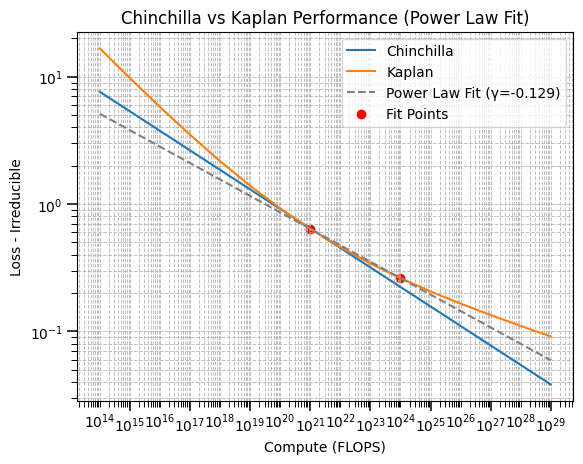

In [37]:
Cs = [10 ** i for i in range(14, 30)]
loss_chinchilla = list(map(chinchilla_optimal, Cs))
loss_kaplan = list(map(kaplan_optimal, Cs))

# Fit a power law curve: loss = A * C^gamma through two points
# Pick two points (arbitrarily select two C values and their corresponding Chinchilla loss values)
C1 = Cs[(22-12)] # For example, at index 2
C2 = Cs[-9]   # and at index -3
L1 = kaplan_optimal(C1)
L2 = kaplan_optimal(C2)

# Solve for gamma and A:
# L1 = A * C1**gamma
# L2 = A * C2**gamma
# ==> (L2/L1) = (C2/C1)**gamma
gamma_fit = np.log(L2/L1) / np.log(C2/C1)
A_fit = L1 / (C1 ** gamma_fit)

# Now calculate power-law losses using these parameters
loss_powerlaw_fit = [A_fit * (C ** gamma_fit) for C in Cs]

plt.figure()
plt.plot(Cs, loss_chinchilla, label='Chinchilla')
plt.plot(Cs, loss_kaplan, label='Kaplan')
plt.plot(Cs, loss_powerlaw_fit, label=f"Power Law Fit (γ={gamma_fit:.3f})", linestyle='--', color='gray')
plt.scatter([C1, C2], [L1, L2], c='red', label='Fit Points')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Compute (FLOPS)')
plt.ylabel('Loss - Irreducible')
plt.title('Chinchilla vs Kaplan Performance (Power Law Fit)')

plt.grid(True, which='both', axis='both', ls='--', linewidth=0.7, alpha=0.8)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.LogLocator(base=10, subs=np.arange(1.0, 10.0)*0.1, numticks=100))
plt.gca().yaxis.set_minor_locator(plt.LogLocator(base=10, subs=np.arange(1.0, 10.0)*0.1, numticks=100))
plt.tick_params(axis='both', which='minor', length=4, width=0.7)
plt.tick_params(axis='both', which='major', length=7, width=1.1)

plt.legend()

In [40]:
print((20*1683000)/(1683000**0.74))


831.4035332583203


In [11]:
(.127/.154)*.091

0.07504545454545454

In [42]:
print((20*1683000)/(1683000**0.74))
print("1.27*1.1*1.73")

831.4035332583203
1.27*1.1*1.73
